### 주택 가격 예측 (House Price Regression)

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

# 경고문 미표시
import warnings
warnings.filterwarnings(action='ignore')

# 데이터프레임 표시 제한 설정
pd.options.display.max_rows = 30
pd.options.display.max_columns = 30

### 데이터 불러오기

In [2]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

housing.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

- 데이터 상위 행 살펴보기

In [3]:
data = housing['frame']
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# 'DESCR' : Description / 변수 설명
print(housing['DESCR'])

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1

### 데이터 미리보기

In [5]:
# 데이터프레임 정보
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# 중복된 데이터 확인
data.duplicated().sum()

np.int64(0)

In [7]:
# 결측치 확인
data.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64

### 단순 선형 회귀 (Simple Linear Regression)

In [8]:
# OverallQual, GrLivArea, GarageCars 변수 선택
features = ['GrLivArea']
target = 'SalePrice'

X = data[features]
y = data[target]

X.shape, y.shape

((1460, 1), (1460,))

In [9]:
# 결측치 확인
X.isnull().sum()

GrLivArea    0
dtype: int64

In [10]:
# Features 데이터 확인
X.head()

,GrLivArea
0,1710
1,1262
2,1786
3,1717
4,2198


In [11]:
# Target 데이터 확인
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

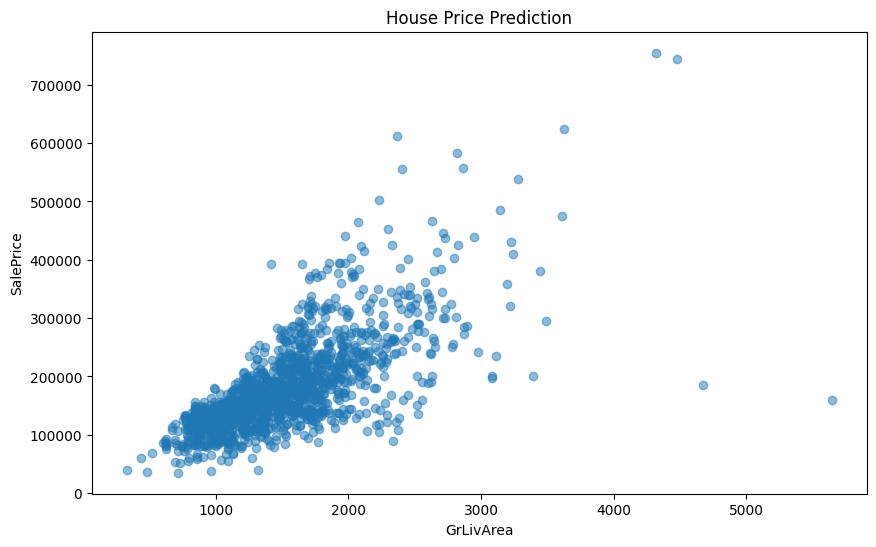

In [12]:
# matplotlib scatter를 이용한 산점도
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('House Price Prediction')
plt.show()

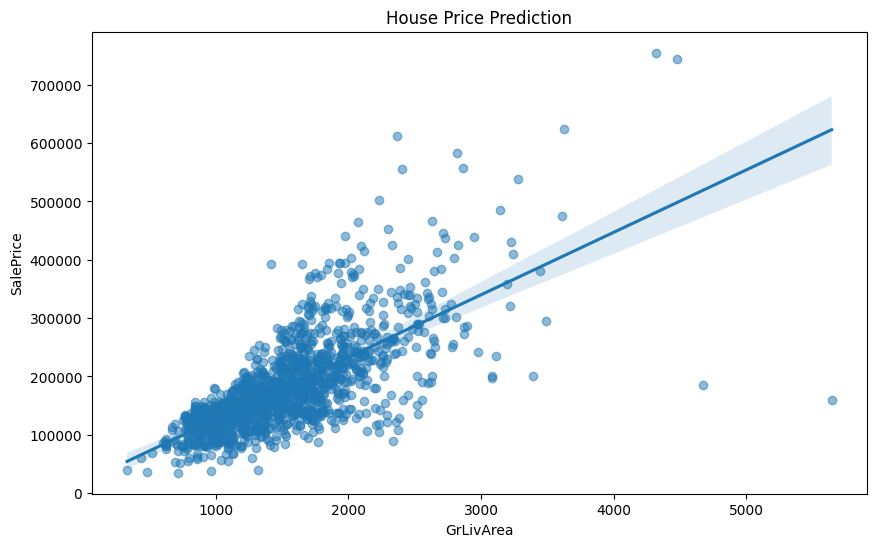

In [13]:
# seaborn의 regplot을 이용한 산점도
# regplot : 산점도 + 선형회귀선 (Regression Line)
plt.figure(figsize=(10, 6))
sns.regplot(x=X, y=y, scatter_kws={'alpha':0.5})
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('House Price Prediction')
plt.show()

In [14]:
X

,GrLivArea
0,1710
1,1262
2,1786
3,1717
4,2198
...,...
1455,1647
1456,2073
1457,2340
1458,1078


In [15]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

- Train_Test_Split

    - random_state : 동일한 random_state 값에 대해서는 train_test_split 을 여러 번 실행해도 결과값이 항상 일정하다. 값을 조절해가며 모델 성능을 실험해본다.

    - test_size : 실수 입력시 test_size 의 비율을 결정, 정수 입력시 test_size 의 개수를 결정

In [16]:
# Train - Test 분할 (Hold-out Validation)
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=42) 

print(X_tr.shape, y_tr.shape)
print(X_val.shape, y_val.shape)

(1168, 1) (1168,)
(292, 1) (292,)


In [17]:
X_tr.head()

,GrLivArea
254,1314
1066,1571
638,796
799,1768
380,1691


In [18]:
# 기본 선형회귀
from sklearn.linear_model import LinearRegression

# 기본적인 최소제곱법(OLS) 사용
# 최소제곱법 : 실제값과 예측값의 오차(잔차)의 제곱들의 합이 최소가 되게 한다.
lr_model = LinearRegression()
lr_model.fit(X_tr, y_tr)

LinearRegression()

In [19]:
# 평균
y_tr.mean()

np.float64(181441.5419520548)

In [20]:
# 계수(기울기)
lr_model.coef_

array([102.48895892])

In [21]:
# 상수(절편)
lr_model.intercept_

np.float64(24899.74815733818)

In [22]:
# SalePrice =  24899 + 102.4889 * GrLivArea
# 모델로 설명을 못하는 부분이 상수부분 , y_tr.mean() 이 180,000 인데 절편이 25,000 이니 아직 정확성이 떨어진다.
# 따라서 다른 독립변수를 추가해서 절편을 최소화하는게 모델을 정교하게 만드는 것이다.

In [23]:
# 성능 평가 (R^2 결정계수)
print(f"훈련 셋: {lr_model.score(X_tr, y_tr)}")
print(f"검증 셋: {lr_model.score(X_val, y_val)}")

훈련 셋: 0.483931586143035
검증 셋: 0.5542632452871117


In [24]:
# 성능 평가 (MSE) (오차의 제곱의 합의 평균)
from sklearn.metrics import mean_squared_error
# 실제값 (y_) 와 예측값 (lr_model.predict(X_)) 의 차이의 제곱들의 합의 평균 (Mean Squared Error)
print(f"훈련 셋: {mean_squared_error(y_tr, lr_model.predict(X_tr))}")
print(f"검증 셋: {mean_squared_error(y_val, lr_model.predict(X_val))}")

훈련 셋: 3078116053.85812
검증 셋: 3418946311.180807


In [25]:
# 성능 평가 (MAE) (오차의 절대값의 합의 평균)
from sklearn.metrics import mean_absolute_error
# 실제값 (y_) 와 예측값 (lr_model.predict(X_)) 의 차이의 절대값들의 합의 평균 (Mean Absolute Error)
print(f"훈련 셋: {mean_absolute_error(y_tr, lr_model.predict(X_tr))}")
print(f"검증 셋: {mean_absolute_error(y_val, lr_model.predict(X_val))}")

훈련 셋: 37328.73928647853
검증 셋: 38341.204476421066


In [26]:
# 성능 평가 (RMSE) (오차의 절대값의 합의 평균의 제곱근) (MSE 의 제곱근)
from sklearn.metrics import root_mean_squared_error
# 실제값 (y_) 와 예측값 (lr_model.predict(X_)) 의 차이의 제곱들의 합의 평균의 제곱근 (Root Mean Absolute Error)
print(f"훈련 셋: {mean_absolute_error(y_tr, lr_model.predict(X_tr))}")
print(f"검증 셋: {mean_absolute_error(y_val, lr_model.predict(X_val))}")

훈련 셋: 37328.73928647853
검증 셋: 38341.204476421066


### 다중 선형 회귀 (Multiple Linear Regression)

In [27]:
# OverallQual, GrLivArea, GarageCars 변수 선택
features = ['OverallQual', 'GrLivArea', 'GarageCars']
target = 'SalePrice'

X = data[features]
y = data[target]

X.shape, y.shape

((1460, 3), (1460,))

In [28]:
# 결측치 확인
X.isnull().sum()

OverallQual    0
GrLivArea      0
GarageCars     0
dtype: int64

In [29]:
# Features 데이터 확인
X.head()

,OverallQual,GrLivArea,GarageCars
0,7,1710,2
1,6,1262,2
2,7,1786,2
3,7,1717,3
4,8,2198,3


In [30]:
# Target 데이터 확인
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [31]:
# 변수 간의 상관계수
pd.concat([X, y], axis=1).corr()

,OverallQual,GrLivArea,GarageCars,SalePrice
OverallQual,1.000000,0.593007,0.600671,0.790982
GrLivArea,0.593007,1.000000,0.467247,0.708624
GarageCars,0.600671,0.467247,1.000000,0.640409
SalePrice,0.790982,0.708624,0.640409,1.000000


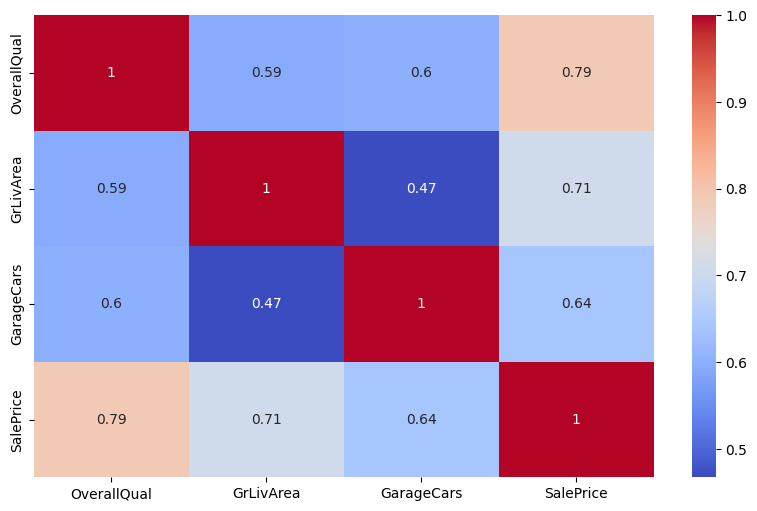

In [32]:
# Heatmap
# annot=True : 각 셀의 값 표시 여부
plt.figure(figsize=(10, 6))
sns.heatmap(pd.concat([X, y], axis=1).corr(), annot=True, cmap='coolwarm')
plt.show()

In [33]:
# Train - Test 분할 (Hold-out Validation)
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_tr.shape, y_tr.shape)
print(X_val.shape, y_val.shape)

(1168, 3) (1168,)
(292, 3) (292,)


In [34]:
# 기본 선형회귀
from sklearn.linear_model import LinearRegression

# 기본적인 최소제곱법(OLS) 사용
lr_model = LinearRegression()
lr_model.fit(X_tr, y_tr)

LinearRegression()

In [35]:
# 계수
lr_model.coef_

array([26772.48983385,    47.2285051 , 22239.45989805])

In [36]:
# 상수(절편)
lr_model.intercept_

# 양의 상관관계를 가지는 변수들만 대입해서 절편이 큰 음수, 음의 상관관계를 가지는 변수들을 추가로 고려하면 향상될 수 있다.

np.float64(-94208.72140326074)

In [37]:
# 성능 평가 (R^2 결정계수)
print(f"훈련 셋: {lr_model.score(X_tr, y_tr)}")
print(f"검증 셋: {lr_model.score(X_val, y_val)}")

훈련 셋: 0.7318323626548342
검증 셋: 0.7585805446926186


In [38]:
# 성능 평가 (MSE)
from sklearn.metrics import mean_squared_error
print(f"훈련 셋: {mean_squared_error(y_tr, lr_model.predict(X_tr))}")
print(f"검증 셋: {mean_squared_error(y_val, lr_model.predict(X_val))}")

훈련 셋: 1599499383.1692665
검증 셋: 1851765974.969048


In [39]:
# 성능 평가 (MAE)
from sklearn.metrics import mean_absolute_error
print(f"훈련 셋: {mean_absolute_error(y_tr, lr_model.predict(X_tr))}")
print(f"검증 셋: {mean_absolute_error(y_val, lr_model.predict(X_val))}")

훈련 셋: 27161.035279273263
검증 셋: 28121.524151747955


In [40]:
# 변수의 개수가 늘어날수록 설명력이 좋아지지만 지나치게 많을 경우 오히려 설명력이 감소한다.